* 개선을 위한 방법
1. 마지막엔 test을 나누지말고 그냥 전부 train 시켜버린다
2. 쓸데 없는 열을 버려본다?
3. 앙상블 모델을 써볼까?

In [1]:
# 샘플링
# 시퀀스 30에서 늘리기
# class 결측치 채워보기

# 1. 데이터 불러오기 및 파악

In [1]:
import pandas as pd
import numpy as np
import joblib

# 데스크탑
# df = pd.read_csv("C:\\Users\\Hong_PC\\Desktop\\기상청 날씨 빅데이터 공모전\\과제2\\fog_train.csv", index_col=0)

# 노트북
df = pd.read_csv("C:\\Users\\User\\Desktop\\기상청 날씨 빅데이터 공모전\\과제2\\fog_train.csv", index_col=0)

In [ ]:
# 열 이름의 . 앞에 단어 제거
df.columns = [col.split('.')[-1] if '.' in col else col for col in df.columns]

In [ ]:
df.head()

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
1,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
2,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
3,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
4,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
5,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3156459 entries, 1 to 3156459
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      object 
 1   month     int64  
 2   day       int64  
 3   time      int64  
 4   minute    int64  
 5   stn_id    object 
 6   ws10_deg  float64
 7   ws10_ms   float64
 8   ta        float64
 9   re        float64
 10  hm        float64
 11  sun10     float64
 12  ts        float64
 13  vis1      int64  
 14  class     int64  
dtypes: float64(7), int64(6), object(2)
memory usage: 385.3+ MB


In [ ]:
df.describe()

,month,day,time,minute,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
count,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06
mean,6.521931e+00,1.573276e+01,1.150007e+01,2.500016e+01,1.852152e+02,1.999417e+00,1.328812e+01,-4.298995e-01,6.667729e+01,-1.288869e+00,1.282955e+01,1.963548e+04,3.246275e+00
std,3.448969e+00,8.801320e+00,6.922149e+00,1.707819e+01,1.072184e+02,4.721616e+00,1.100537e+01,6.929268e+00,2.173623e+01,1.171355e+01,2.257327e+01,1.206407e+04,8.668957e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.900000e+01,-9.900000e+01
25%,4.000000e+00,8.000000e+00,6.000000e+00,1.000000e+01,8.470000e+01,9.000000e-01,5.500000e+00,0.000000e+00,5.130000e+01,0.000000e+00,5.100000e+00,1.229700e+04,4.000000e+00
50%,7.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01,2.094000e+02,1.800000e+00,1.430000e+01,0.000000e+00,6.870000e+01,0.000000e+00,1.570000e+01,2.000000e+04,4.000000e+00
75%,1.000000e+01,2.300000e+01,1.800000e+01,4.000000e+01,2.769000e+02,3.000000e+00,2.200000e+01,0.000000e+00,8.470000e+01,1.600000e-01,2.430000e+01,2.000000e+04,4.000000e+00
max,1.200000e+01,3.100000e+01,2.300000e+01,5.000000e+01,3.600000e+02,2.250000e+01,3.780000e+01,1.000000e+00,1.000000e+02,2.687000e+01,7.010000e+01,6.052500e+04,4.000000e+00


In [ ]:
df.columns

Index(['year', 'month', 'day', 'time', 'minute', 'stn_id', 'ws10_deg',
       'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts', 'vis1', 'class'],
      dtype='object')

In [ ]:
# # 시간
# df['year'].value_counts() # 년도
# df['month'].value_counts() # 월
# df['day'].value_counts() # 일
# df['time'].value_counts() # 시간(0~23)
# df['minute'].value_counts() # 분(10분 단위)
# df['stn_id'].value_counts() # 지점 번호

# -99 있음
# df['ws10_deg'].value_counts() # 10분 평균 풍향, 단위 : deg
# df['ws10_ms'].value_counts() # 10분 평균 풍속, 단위 : m/s
# df['ta'].value_counts() # 1분 평균 기온 10분 주기, 단위 : C
# df['re'].value_counts() # 강수 유무(0:무강수, 1:강수)
# df['hm'].value_counts() # 1분 평균 상대 습도 10분 주기, 단위 : %
# df['sun10'].value_counts() # 1분 일사량 10분 단위 합계, 단위 : MJ
# df['ts'].value_counts() # 1분 평균 지면온도 10분 주기, 단위 : C
# df['vis1'].value_counts() # 1분 평균 시정 10분 주기, 단위 : C(test데이터 셋엔 없음)
# df['class'].value_counts() # 시정 구간

# 2. 문자열 데이터 정리

## 2-1. year열 I,J,K 순으로 0,1,2로 맵핑

In [ ]:
# year열 I,J,K 순으로 0,1,2로 맵핑
df['year'].value_counts()
df['year'] = df['year'].map({'I': 0, 'J': 1, 'K': 2})

## 2-2. 20개 지점을 5개의 지역으로 수치화

In [ ]:
# 첫 글자를 추출하여 새로운 열 생성
df['first_letter'] = df['stn_id'].str[0]

# 알파벳 순서에 따라 번호를 부여
alphabet_order = {char: idx for idx, char in enumerate(sorted(df['first_letter'].unique()))}
df['stn_id'] = df['first_letter'].map(alphabet_order)
df.drop(columns=['first_letter'], inplace=True)

df['stn_id'].value_counts()

0    1262584
1     631292
3     473469
4     473468
2     315646
Name: stn_id, dtype: int64

# 3. 결측치 처리

## 3-1.독립변수 결측치 처리

In [ ]:
# # 방법1 : -99.9를 전부 제거
# # -99.9를 다 날렸을 때 (315만개중에 15만개로 손실)
# df1 = df1[(df1['ws10_deg'] != -99.9) & (df1['ws10_ms'] != -99.9) & (df1['ta'] != -99.9) & (df1['re'] != -99.9) & (df1['hm'] != -99.9) & (df1['sun10'] != -99.9) & (df1['ts'] != -99.9)]
# print(df1.shape)
# # (2994850, 15)

# # 확인용
# # # -99.9를 다 날렸을 때 (13만개 손실, 그중 413개만이 class가 4가 아님, 0.0002%라 그냥 버려도 될듯)
# # df10 = df1.copy()
# # df12 = df10[(df10['ws10_deg'] == -99.9) | (df10['ws10_ms'] == -99.9) | (df10['ta'] == -99.9) | (df10['re'] == -99.9) | (df10['hm'] == -99.9) | (df10['sun10'] == -99.9) | (df10['ts'] == -99.9)]
# # print(df12.shape)
# # print(df12[(df12['class']!=4)].shape)

In [ ]:
# 방법2 : -99.9를 NA 처리후 선형보간법
# df에서 변수들 -99 NA처리
# 변환할 열 리스트
numeric_cols = ['stn_id', 'ws10_deg', 'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts']

# -99.9 값을 NaN으로 변환
df[numeric_cols] = df[numeric_cols].replace(-99.9, np.nan)

# 선형보간법을 이용하여 NA값 처리
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')
print(df.isnull().sum())

year        0
month       0
day         0
time        0
minute      0
stn_id      0
ws10_deg    0
ws10_ms     0
ta          0
re          0
hm          0
sun10       0
ts          0
vis1        0
class       0
dtype: int64


In [ ]:
# 'fog_train.vis1'이나 'fog_train.class' 열의 값이 -99.9인 행을 제거합니다.(315만개중에 2만개 손실)
# df1은 class -99를 제거했을 떄의 임시 데이터
df1 = df[(df['vis1'] != -99) & (df['class'] != -99)]
print(df.shape)
print(df1.shape)

(3156459, 15)
(3133943, 15)


In [ ]:
# 데이터 비율 (0.01%, 1:99)
print(df1[(df1['class']!=4)].shape)
print(df1[(df1['class']==4)].shape)

(32134, 15)
(3101809, 15)


In [ ]:
df
df['class'].value_counts()
df['stn_id'].value_counts()

0    1262584
1     631292
3     473469
4     473468
2     315646
Name: stn_id, dtype: int64

# 4. 이상치 처리

## 4-1. 시간과 re열, target를 제외한 나머지의 이상치 탐지 + 대체
- Boxplot 사용(시각화)  
- 수정된 Z-score 사용(이상치 탐지)  
- 직전값을 대체

### 4-1-1. 이상치 대체 전 시각화(Boxplot)

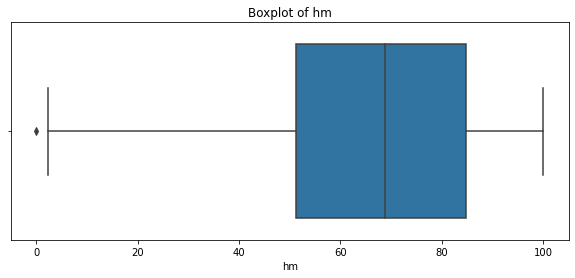

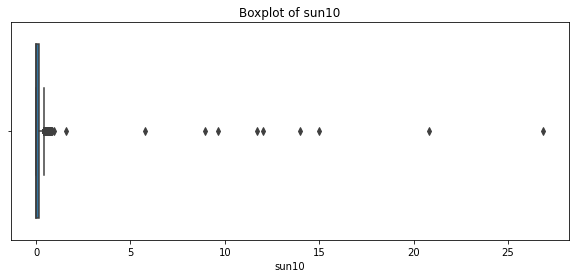

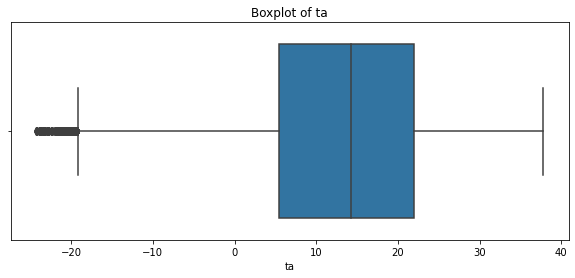

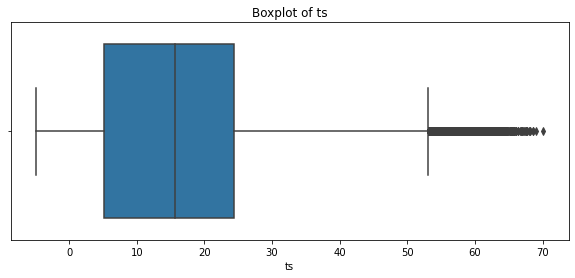

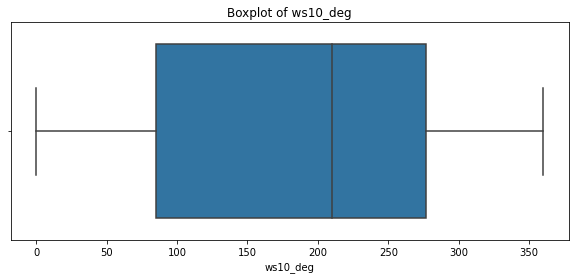

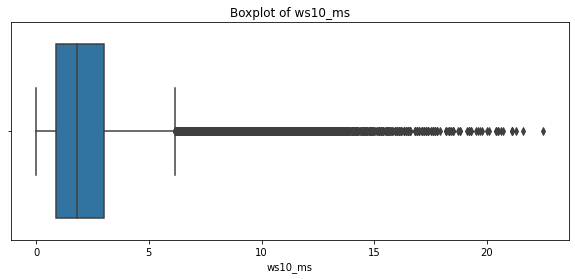

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 이상치 처리가 필요한 열들 features
features = df.columns.difference(['year', 'month', 'day', 'time', 're', 'stn_id', 'minute', 'vis1', 'class'])

# 이상치 시각화
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [ ]:
# 오래 걸림 pass
'''
# 추가 
# 정규분포 sun10열
plt.figure(figsize=(10, 6))
sns.histplot(df['sun10'], kde=True, stat="density", linewidth=0)
plt.title('Distribution of sun10')
plt.xlabel('sun10')
plt.ylabel('Density')

# 정규분포 곡선 추가
mean = df['sun10'].mean()
std = df['sun10'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

plt.show()
'''

'\n# 추가 \n# 정규분포 sun10열\nplt.figure(figsize=(10, 6))\nsns.histplot(df[\'sun10\'], kde=True, stat="density", linewidth=0)\nplt.title(\'Distribution of sun10\')\nplt.xlabel(\'sun10\')\nplt.ylabel(\'Density\')\n\n# 정규분포 곡선 추가\nmean = df[\'sun10\'].mean()\nstd = df[\'sun10\'].std()\nxmin, xmax = plt.xlim()\nx = np.linspace(xmin, xmax, 100)\np = np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))\nplt.plot(x, p, \'k\', linewidth=2)\n\nplt.show()\n'

### 4-1-2. 이상치 탐지(수정된 Z-score)

**수정된 Z-score**

**장점**
1. 비정규성 대응: 기존의 z-score가 정규 분포를 가정하는 반면, 수정된 z-score는 비정규성에 대응하여 더욱 강건하게 이상치를 탐지합니다.
2. 중위수와 MAD 사용: 평균과 표준 편차 대신 중위수와 MAD를 사용하므로 이상치에 민감하지 않고 강력한 방법입니다.
3. 유연성: 데이터의 특성에 따라 기준값을 조정하여 적용할 수 있습니다.  

**단점**
1. 데이터 분포 의존성: 여전히 데이터의 분포에 영향을 받을 수 있습니다. 특히 극단적으로 비대칭적인 분포에서는 적합하지 않을 수 있습니다.
2. 상대적으로 복잡한 계산: 기존의 z-score에 비해 계산이 복잡하며, 대량의 데이터에 대한 계산이 상대적으로 느릴 수 있습니다.

In [ ]:
'''modified Z-score 사용시 sun10열의 이상치가 100만개 넘게 나와서 포기!'''
# # modified Z-score 사용시
# def detect_outliers(df, features):
#     outliers_indices = {}
#     threshold = 3.0
    
#     for feature in features:
#         ys = df[feature].values
#         median_y = np.median(ys)
#         median_absolute_deviation_y = np.median(np.abs(ys - median_y))
        
#         if median_absolute_deviation_y == 0:
#             modified_z_scores = np.zeros_like(ys)
#         else:
#             modified_z_scores = 0.6745 * (ys - median_y) / median_absolute_deviation_y
        
#         outliers_indices[feature] = np.where(np.abs(modified_z_scores) > threshold)[0]
    
#     return outliers_indices

'modified Z-score 사용시 sun10열의 이상치가 100만개 넘게 나와서 포기!'

In [ ]:
# Z-score를 통한 이상치 탐지
def detect_outliers(df, features):
    outliers_indices = {}
    for feature in features:
        mean = df[feature].mean()
        std = df[feature].std()
        z_scores = (df[feature] - mean) / std
        outliers_indices[feature] = np.where(np.abs(z_scores) > 3)[0]
    return outliers_indices


# 이상치 탐지
outliers_indices = detect_outliers(df, features)

In [ ]:
# 이상치 개수 확인
for feature, indices in outliers_indices.items():
    print(f'{feature} 컬럼은 {len(indices)} 개의 이상치가 확인됨')

hm 컬럼은 8 개의 이상치가 확인됨
sun10 컬럼은 26300 개의 이상치가 확인됨
ta 컬럼은 1234 개의 이상치가 확인됨
ts 컬럼은 8757 개의 이상치가 확인됨
ws10_deg 컬럼은 0 개의 이상치가 확인됨
ws10_ms 컬럼은 49013 개의 이상치가 확인됨


### 4-1-3. 이상치 대체

In [ ]:
# 이상치 대체 함수 정의

def replace_outliers(df, outliers_indices):
    for feature, indices in outliers_indices.items():
        df.loc[indices, feature] = np.nan
        df[feature] = df[feature].interpolate(method='linear') # 선형보간법
        # method='ffill', 'bfill'쓰면 직전 값, 직후 값으로 대체 가능
    return df

# 이상치 대체 수행
replace_outliers(df, outliers_indices)

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
1,I,1,1,0,10,0,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
2,I,1,1,0,20,0,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
3,I,1,1,0,30,0,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
4,I,1,1,0,40,0,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
5,I,1,1,0,50,0,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156455,K,12,31,23,10,4,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000,4
3156456,K,12,31,23,20,4,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000,4
3156457,K,12,31,23,30,4,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000,4
3156458,K,12,31,23,40,4,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000,4


In [ ]:
# 대체 후 이상치 탐지
outliers_indices_after = detect_outliers(df, features)

# 대체 후 이상치 개수 확인
for feature, indices in outliers_indices_after.items():
    print(f'{feature} 컬럼은 이상치 대체 후 {len(indices)} 개의 이상치가 확인됨')


# 원래 이상치
# hm 컬럼은 8 개의 이상치가 확인됨
# sun10 컬럼은 26300 개의 이상치가 확인됨
# ta 컬럼은 1234 개의 이상치가 확인됨
# ts 컬럼은 8757 개의 이상치가 확인됨
# ws10_deg 컬럼은 0 개의 이상치가 확인됨
# ws10_ms 컬럼은 49013 개의 이상치가 확인됨

hm 컬럼은 이상치 대체 후 4 개의 이상치가 확인됨
sun10 컬럼은 이상치 대체 후 20383 개의 이상치가 확인됨
ta 컬럼은 이상치 대체 후 813 개의 이상치가 확인됨
ts 컬럼은 이상치 대체 후 5851 개의 이상치가 확인됨
ws10_deg 컬럼은 이상치 대체 후 0 개의 이상치가 확인됨
ws10_ms 컬럼은 이상치 대체 후 50769 개의 이상치가 확인됨


### 4-1-4. 이상치 대체 후 시각화(Boxplot)

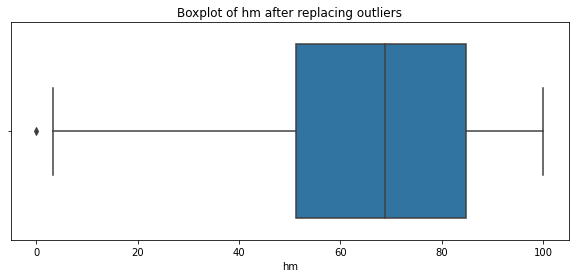

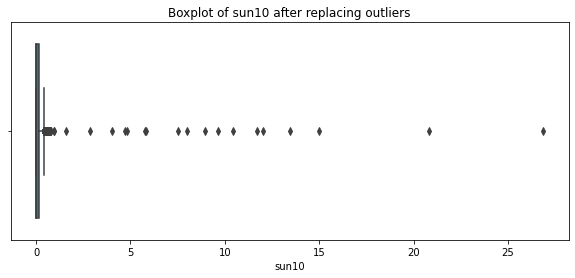

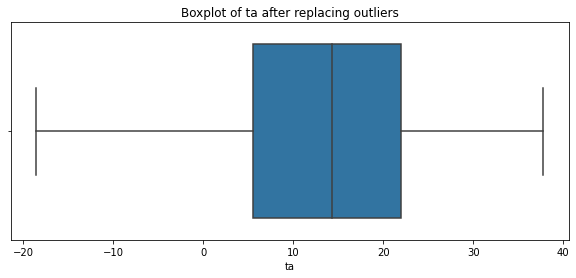

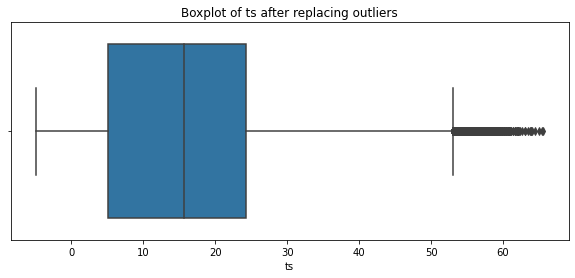

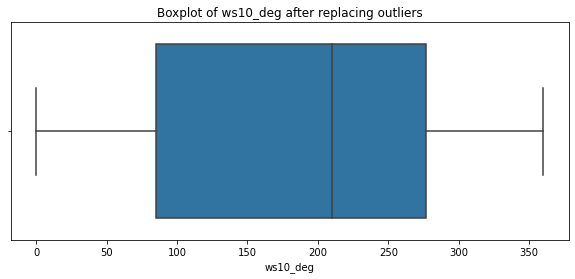

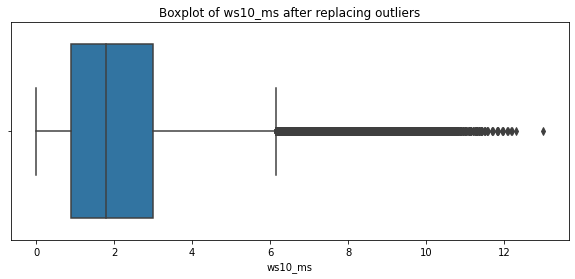

In [ ]:
# 이상치 대체 후 시각화
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature} after replacing outliers')
    plt.show()

# 5.정규화

## 5-1. 시간과 re열, target를 제외한 나머지의 데이터 정규화
> Min-Max, Standard, Robust 적용 후 비교

**1. Min-Max Scaler**

특징: 데이터 값을 0과 1 사이로 스케일링

적용 대상: 데이터가 정규 분포에 가깝고, 이상치가 적은 경우

장점: 모든 데이터가 동일한 범위로 스케일링되어 학습이 빠름

단점: 이상치에 매우 민감하며, 극단적인 값이 있을 경우 대부분의 데이터가 매우 좁은 범위로 압축될 수 있음

**2. Standard Scaler**

특징: 데이터의 평균을 0, 표준 편차를 1로 변환

적용 대상: 데이터가 정규 분포를 따르지 않고, 이상치가 적당히 존재하는 경우

장점: 평균과 분산이 고정된 데이터로 학습할 때 효과적

단점: 이상치가 있으면 평균과 표준 편차에 큰 영향을 줄 수 있음

**3. Robust Scaler**

특징: 중앙값을 0, IQR(Interquartile Range)를 사용하여 스케일링

적용 대상: 이상치가 많은 데이터에 적합

장점: 이상치의 영향을 크게 받지 않음

단점: 데이터의 중심이 중앙값으로 이동하므로, 데이터 분포의 비대칭성을 고려해야 함

## 5-2. Min-Max Scaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# features = df.columns.difference(['year', 'month', 'day', 'time', 'minute', 're', 'stn_id', 'vis1', 'class'])

# df[features] = scaler.fit_transform(df[features])
# df

## 5-2. Standard Scaler

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# features = df.columns.difference(['year', 'month', 'day', 'time', 'minute', 're', 'stn_id', 'vis1', 'class'])

# df[features] = scaler.fit_transform(df[features])
# df

## 5-3. Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
features = df.columns.difference(['year', 'month', 'day', 'time', 'minute', 're', 'stn_id', 'vis1', 'class'])

df[features] = scaler.fit_transform(df[features])
df

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
1,I,1,1,0,10,0,-1.094468,-0.857143,-1.254545,0.0,-0.892216,-0.036898,-0.963542,20000,4
2,I,1,1,0,20,0,-1.094468,-0.857143,-1.248485,0.0,-0.922156,-0.036898,-0.958333,20000,4
3,I,1,1,0,30,0,-1.094468,-0.857143,-1.248485,0.0,-0.859281,-0.036898,-0.953125,20000,4
4,I,1,1,0,40,0,-0.949374,-0.666667,-1.242424,0.0,-0.874251,-0.036898,-0.953125,20000,4
5,I,1,1,0,50,0,-0.782881,-0.619048,-1.236364,0.0,-0.865269,-0.036898,-0.947917,20000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156455,K,12,31,23,10,4,0.498956,2.809524,-0.715152,0.0,-0.553892,-0.036898,-0.864583,20000,4
3156456,K,12,31,23,20,4,0.438935,1.857143,-0.727273,0.0,-0.556886,-0.036898,-0.885417,20000,4
3156457,K,12,31,23,30,4,0.336639,1.476190,-0.733333,0.0,-0.529940,-0.036898,-0.890625,20000,4
3156458,K,12,31,23,40,4,0.316284,1.333333,-0.739394,0.0,-0.508982,-0.036898,-0.901042,20000,4


# 6. class 결측치 채우기

## 6-1. svm를 활용하여 vis1 결측값 예측한 후, 해당 예측값을 결측값을 대체

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
# df_SVM는 class를 svm으로 채운 데이터 셋
df_SVM = df.copy()

In [ ]:
# 나중에 비교를 위한
# class 분포 확인 함수
def count_classes(df_SVM):
    return df_SVM['class'].value_counts()

# 초기 class 분포
initial_class_counts = count_classes(df_SVM)

In [ ]:
# SVM 회귀를 사용하여 vis1의 결측치 예측
# 결측치가 아닌 행과 결측치인 행을 구분
train_data = df_SVM[df_SVM['vis1'] != -99]
test_data = df_SVM[df_SVM['vis1'] == -99]

# 제외할 열을 지정하여 feature 선택
features = df_SVM.columns.difference(['vis1', 'class'])

# 학습을 위한 feature와 target 분리
X_train = train_data[features]
y_train = train_data['vis1']
X_test = test_data[features]

# SVM 회귀 모델 학습 및 예측
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

# 예측된 값으로 vis1 결측치 대체
df_SVM.loc[df_SVM['vis1'] == -99, 'vis1'] = y_pred  

In [ ]:
# class 분류 함수
def classify_visibility(vis1):
    if vis1 < 200:
        return 1
    elif vis1 < 500:
        return 2
    elif vis1 < 1000:
        return 3
    else:
        return 4

# class가 -99인 행에 대해 vis1을 기반으로 class 값 분류
df_SVM.loc[df_SVM['class'] == -99, 'class'] = df_SVM.loc[df_SVM['class'] == -99, 'vis1'].apply(classify_visibility)

In [ ]:
# 최종 class 분포
final_class_counts = count_classes(df_SVM)

# 결과 출력
print("Initial class counts:\n", initial_class_counts)
print("Final class counts:\n", final_class_counts)

In [ ]:
# y_pred 살피면 몇 개씩 예측했는지 나올 듯

### 완성된 데이터 셋 저장

In [ ]:
from sklearn.externals import joblib
joblib.dump(df_SVM, 'C:\\Users\\User\\Desktop\\기상청 날씨 빅데이터 공모전\\과제2\\df_SVM.pkl')

In [ ]:
# 이후는 모델 예측

### CLASS 예측(분류)

#### RNN

In [ ]:
df2

,year,month,day,time,minute,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,class,stn_id_5
0,0,1,1,0,10,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,4,0
1,0,1,1,0,20,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,4,0
2,0,1,1,0,30,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,4,0
3,0,1,1,0,40,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,4,0
4,0,1,1,0,50,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,2,12,31,23,10,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,4,4
3156455,2,12,31,23,20,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,4,4
3156456,2,12,31,23,30,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,4,4
3156457,2,12,31,23,40,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,4,4


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import seaborn as sns

In [19]:
# 특성과 타겟 정의
features = df2.drop(['class'], axis=1).values.astype('float32')
target = df2['class'].values

# 타겟 원-핫 인코딩
target_encoded = to_categorical(target - 1)  # assuming class labels are 1 to 4

# 데이터 정규화
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [23]:
# 시퀀스 데이터 생성 함수
def create_sequences(data, target, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(target[i + sequence_length])
    return np.array(sequences, dtype=np.float32), np.array(labels, dtype=np.float32)

# 시퀀스 길이 정의
sequence_length = 4320  # 1달을 기준으로 30개 타임스텝을 사용

In [25]:
# 시퀀스 데이터 생성
X, y = create_sequences(features_scaled, target_encoded, sequence_length)

# 학습 데이터와 테스트 데이터 분리
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

MemoryError: Unable to allocate 626. GiB for an array with shape (2990530, 4320, 13) and data type float32

In [ ]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, X.shape[2]), return_sequences=False))
model.add(Dense(4, activation='softmax'))  # 다중 분류를 위한 softmax 활성화 함수

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 얼리스타핑 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3, 
                               verbose=1, # 로그출력
                               restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
 5244/29949 [====>.........................] - ETA: 3:32 - loss: 0.0697 - accuracy: 0.9876

KeyboardInterrupt: 

18718/18718 [==============================] - 86s 5ms/step
Balanced Accuracy: 0.24999957803058434


c:\Users\Hong_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hong_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hong_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1663
           1       0.00      0.00      0.00      2689
           2       0.00      0.00      0.00      2152
           3       0.99      1.00      0.99    592460

    accuracy                           0.99    598964
   macro avg       0.25      0.25      0.25    598964
weighted avg       0.98      0.99      0.98    598964



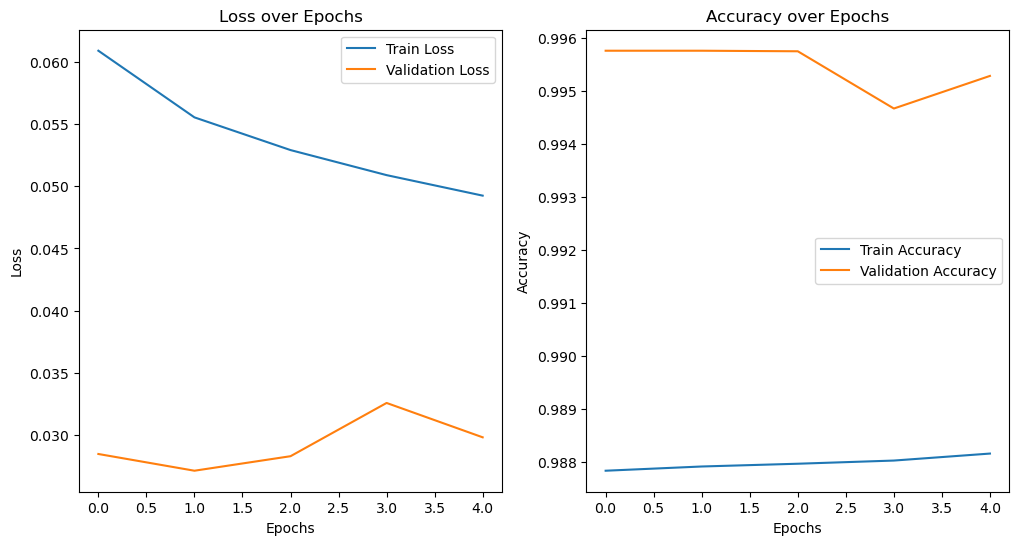

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# balanced accuracy 계산
balanced_acc = balanced_accuracy_score(y_true_classes, y_pred_classes)
print(f'Balanced Accuracy: {balanced_acc}')

# 분류 보고서 출력
print(classification_report(y_true_classes, y_pred_classes))

# CSI 반영
y_true = y_true_classes

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# ACC 및 Balanced ACC 계산
acc = accuracy_score(y_true, y_pred_classes)
balanced_acc = balanced_accuracy_score(y_true, y_pred_classes)

# CSI 계산
H = np.diag(conf_matrix)
F = np.sum(conf_matrix, axis=0) - H
M = np.sum(conf_matrix, axis=1) - H
CSI = np.where((H + F + M) != 0, H / (H + F + M), 0)  # 분모가 0이 되는 것을 방지
mean_CSI = np.mean(CSI)

# 결과 출력
print(f'Accuracy: {acc}')
print(f'Balanced Accuracy: {balanced_acc}')
print(f'CSI per class: {CSI}')
print(f'Mean CSI: {mean_CSI}')

In [ ]:
# 학습 및 검증 손실 그래프
plt.figure(figsize=(12, 6))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 혼동 행렬 그래프
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

#### RF

### VIS1 예측(회귀)

In [ ]:
df3[df3['vis1'==1]]
print(df3[(df3['vis1']!='2000')].shape)
print(df3[(df3['vis1']=='2000')].shape)

#### RNN

In [ ]:
df3

,year,month,day,time,minute,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class,stn_id_5
0,0,1,1,0,10,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4,0
1,0,1,1,0,20,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4,0
2,0,1,1,0,30,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4,0
3,0,1,1,0,40,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4,0
4,0,1,1,0,50,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,2,12,31,23,10,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,20000,4,4
3156455,2,12,31,23,20,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,20000,4,4
3156456,2,12,31,23,30,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,20000,4,4
3156457,2,12,31,23,40,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,20000,4,4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, balanced_accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

In [ ]:
# 특성과 타겟 정의
features = df3.drop(['class', 'vis1'], axis=1).values.astype('float32')
target = df3['vis1'].values.astype('float32')

# 데이터 정규화
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.reshape(-1, 1)).flatten()

In [ ]:
# 시퀀스 데이터 생성 함수
def create_sequences(data, target, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(target[i + sequence_length])
    return np.array(sequences, dtype=np.float32), np.array(labels, dtype=np.float32)

# 시퀀스 길이 정의
sequence_length = 30  # 1달을 기준으로 30개 타임스텝을 사용

In [ ]:
# 시퀀스 데이터 생성
X, y = create_sequences(features_scaled, target_scaled, sequence_length)

# 학습 데이터와 테스트 데이터 분리
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# LSTM 회귀 모델 정의
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, X.shape[2]), return_sequences=False))
model.add(Dense(1))  # 회귀를 위한 단일 출력 뉴런

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 얼리스타핑 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3, 
                               verbose=1, 
                               restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# 학습 결과 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Epoch 1/50
29949/29949 [==============================] - 755s 25ms/step - loss: 0.0216 - val_loss: 0.0398
Epoch 2/50
29949/29949 [==============================] - 864s 29ms/step - loss: 0.0193 - val_loss: 0.0469
Epoch 3/50
29949/29949 [==============================] - 824s 28ms/step - loss: 0.0181 - val_loss: 0.0462
Epoch 4/50
 7549/29949 [======>.......................] - ETA: 8:05 - loss: 0.0176

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 예측된 vis1 값을 기반으로 클래스 분류
def classify_vis1(vis1):
    if vis1 < 200:
        return 1
    elif vis1 < 500:
        return 2
    elif vis1 < 1000:
        return 3
    else:
        return 4

y_pred_classes = np.array([classify_vis1(vis) for vis in y_pred_rescaled])
y_true_classes = np.array([classify_vis1(vis) for vis in y_test_rescaled])

In [ ]:
# balanced accuracy 계산
balanced_acc = balanced_accuracy_score(y_true_classes, y_pred_classes)
print(f'Balanced Accuracy: {balanced_acc}')

# 분류 보고서 출력
print(classification_report(y_true_classes, y_pred_classes))

# 학습 결과 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test_rescaled)), y_test_rescaled, label='True vis1')
plt.scatter(range(len(y_pred_rescaled)), y_pred_rescaled, label='Predicted vis1')
plt.title('True vs Predicted vis1')
plt.xlabel('Sample Index')
plt.ylabel('vis1')
plt.legend()

plt.show()

#### RF